 Overview
 1. Duration time
 2. Q5 roles of participators
 3. Student vs Data scientist

    3.1 Q6 Coding Years
   
    3.2 Q7 Preferred Programming Languages
   
    3.3 Q11 Computing Platforms & Q6 Coding Years
    
    3.4 Q15 Machine Learning Years & Q6 Coding Years
    
    3.5 Q15 Machine Learning Years & Q17 Machine Learning Algorithms
    
    3.6 Q39 Favourite Media Sources 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

color_list = sns.color_palette()

In [2]:
data = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data.iloc[1:]

# 1. Duration Time

The first question which interests me a lot is the time of completing this survey. I spent almost 15 minutes when I took it and I wanted to know how much time other people spent on it.

In [5]:
time_consumed = data['Time from Start to Finish (seconds)'].astype('int')
np.max(time_consumed),np.min(time_consumed)

(1144493, 20)

It is surprising that the maximum spent-time is 1144493 seconds, which is 13 days. Did he forget to submit his survey after completing it?

Text(0, 0.5, '')

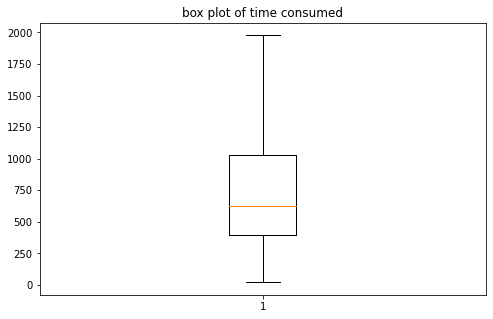

In [6]:
fig,ax = plt.subplots(figsize=(8,5))
ax.boxplot(time_consumed, showfliers=False)
ax.set_title('box plot of time consumed')
ax.set_ylabel('')

In [7]:
len(time_consumed[time_consumed.values<2000])/len(time_consumed)*100

87.07326811738871

After eliminating the outliers by boxplot, the survey completed time falls into the range 0 to 2000 seconds. 87% of participators finish the survey in 2000 seconds. 

Text(0, 0.5, 'Seconds')

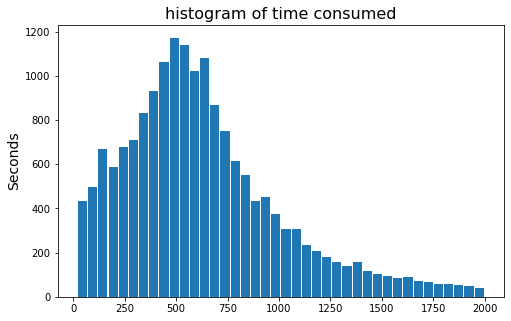

In [8]:
cleaned_time_consumed = time_consumed[time_consumed.values<2000]
fig,ax = plt.subplots(figsize=(8,5))
ax.hist(cleaned_time_consumed,bins=40,rwidth=0.9)
ax.set_title('histogram of time consumed',fontsize=16)
ax.set_ylabel('Seconds',fontsize=14)

# 2. Q5 Current Roles of Participators

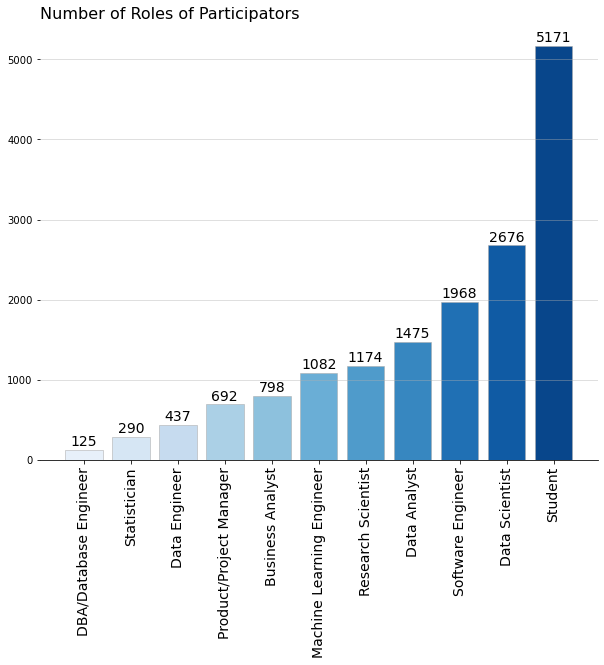

In [9]:
role = data[(data.Q5!='Other')&(data.Q5!='Currently not employed')]['Q5'].value_counts(ascending=True)
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(role.index,role, linewidth=0.5, edgecolor='darkgray', color = sns.color_palette("Blues",11))

for r in role.index:
    ax.annotate(f'{role.loc[r]}',
                    xy=(r, role.loc[r]+100),
                    #xytext=(0, 3),  ##3 points vertical offset
                    #textcoords="offset points",
                    ha='center', va='center',fontsize=14)

for pos in ['left','right','top']:
    ax.spines[pos].set_color(None)
    
ax.set_xticklabels(role.index,rotation=90,fontsize=14)
ax.set_title('Number of Roles of Participators',fontsize=16,loc='left')
ax.grid(axis='y',linestyle='-',alpha=0.5)

1. Student takes the first place and data scientist takes the second place in the number of roles of participators.
2. A small of number of data Engineers and database engineers take the survey, although their works are highly related to data. The reason may be that people of these roles focus more on the works like building data pipeline while kaggle is a data science platform.

# 3. Student vs Data Scientist

As a student who wants to become a data scientist in the future, what are the differences between a student and a data scientist? 

# 3.1 Q6 Coding Years

In [10]:
student = data[data.Q5=='Student']
ds = data[data.Q5=='Data Scientist']

In [11]:
ordered_index = ['I have never written code','< 1 years','1-2 years','3-5 years',
                 '5-10 years','10-20 years', '20+ years']
student_code_time = pd.DataFrame(student.Q6.value_counts()).reindex(ordered_index)
ds_code_time = pd.DataFrame(ds.Q6.value_counts()).reindex(ordered_index)

In [12]:
student_code_time['Q6_percentage'] = student_code_time['Q6'].apply(lambda x: (x/student_code_time['Q6'].sum())*100)
ds_code_time['Q6_percentage'] = ds_code_time['Q6'].apply(lambda x: (x/ds_code_time['Q6'].sum())*100)
grouped_time = pd.concat([student_code_time['Q6_percentage'],-ds_code_time['Q6_percentage']],axis=1)
grouped_time.columns = ['student','data scientist']
for col in ['student','data scientist']:
    grouped_time[col] = grouped_time[col].apply(lambda x: round(x,2))

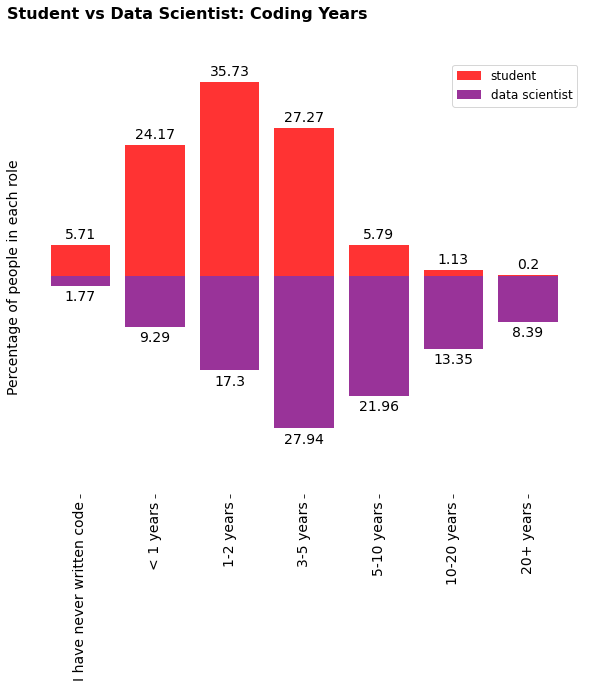

In [13]:
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(grouped_time.index,grouped_time['student'],color='red',alpha=0.8,label='student')
ax.bar(grouped_time.index,grouped_time['data scientist'],color='purple',alpha=0.8,label='data scientist')
ax.set_ylim(-40,40)
for t in grouped_time.index:
    ax.annotate(f"{grouped_time.loc[t,'student']}",
                xy = (t,grouped_time.loc[t,'student']+2),
                va = 'center',ha='center',fontsize=14)

for t in grouped_time.index:
    ax.annotate(f"{-grouped_time.loc[t,'data scientist']}",
                xy = (t,grouped_time.loc[t,'data scientist']-2),
                va = 'center',ha='center',fontsize=14)

for pos in ['left','right','top','bottom']:
    ax.spines[pos].set_color(None)
    
ax.set_ylabel('Percentage of people in each role',fontsize=14)
ax.set_xticklabels(grouped_time.index,rotation=90,fontsize=14)
ax.set_yticks([])
#ax.set_title('Student vs Data Scientist: Coding Years',fontsize=16)
fig.text(0.1, 0.95, 'Student vs Data Scientist: Coding Years', fontsize=16, fontweight='bold') 
ax.legend(fontsize=12)

1. Only Less than 10% of students has coding years more than 5 years and most of the students have 0~5 coding years 
2. More than 40% of data scientists has coding years more than 5 years and most of the data scientists have 3~10 coding years 

If a student wants to become a data scientist, coding time is one of the requirements.

# 3.2 Q7 Preferred Programming Language

### Student

In [14]:
q7_ans = np.empty((len(student),0))
language_columns = ['Python','R','SQL','C','C++','Java','Javascript','Julia','Swift','Bash','MatLab','None']
for i in range(1,14):
    try:
        q7_ans = np.column_stack((q7_ans,student['Q7_Part_'+str(i)]))
    except:
        print('column Q7_Part_'+str(i)+ ' does not exist')
q7_ans = pd.DataFrame(q7_ans)
q7_ans.columns = language_columns
q7_ans.head()

column Q7_Part_13 does not exist


,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MatLab,None
0,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN
1,Python,R,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Python,R,SQL,C,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
q7_ans_dropped_none = q7_ans.drop(columns=['None'],axis=1)
language_cnt = np.empty((1,0))
for col in q7_ans_dropped_none.columns:
    language_cnt = np.append(language_cnt,q7_ans_dropped_none[col].value_counts())
language_cnt = pd.DataFrame(language_cnt)
language_cnt.index = q7_ans_dropped_none.columns
language_cnt.columns = ['count']
language_cnt['count'] = language_cnt['count'].apply(lambda x: round(x)) 
language_cnt = language_cnt.sort_values(by='count',ascending=True)

Text(0.5, 1.0, 'Popularity of languages among students')

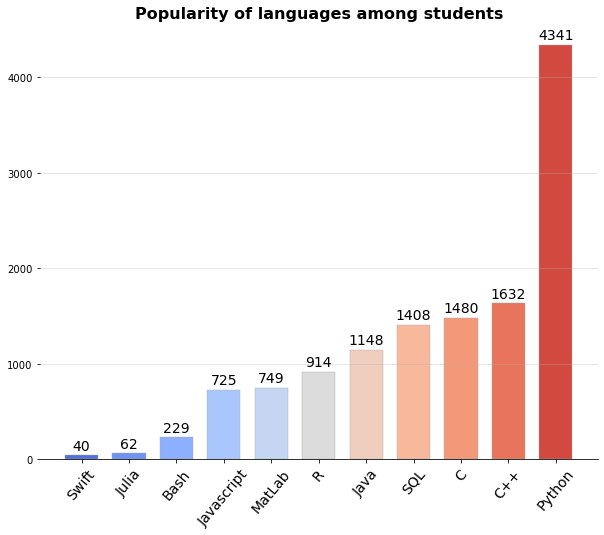

In [16]:
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(language_cnt.index,language_cnt['count'], edgecolor='darkgray',
           width=0.7, linewidth=0.4, color=sns.color_palette('coolwarm',11))

for l in language_cnt.index:
    ax.annotate(f"{language_cnt.loc[l,'count']}",
                xy = (l,language_cnt.loc[l,'count']+100),
                va = 'center',ha='center',fontsize=14)
for pos in ['left','right','top']:
    ax.spines[pos].set_color(None)
    
ax.set_xticklabels(language_cnt.index,fontsize=14,rotation=50)
ax.grid(axis='y',linestyle='-',alpha=0.4)
ax.set_title('Popularity of languages among students',fontsize=16,fontweight='bold')

In [17]:
count_language = pd.DataFrame(q7_ans_dropped_none.isnull().sum(axis=1)).apply(lambda x: 11-x)
cnt_language = pd.DataFrame(count_language.value_counts().sort_index())
cnt_language.columns = ['cnt']
cnt_language['percentage'] = cnt_language['cnt']/len(student)
cnt_language = cnt_language.reset_index()
cnt_language.columns = ['number','cnt','percentage']

In [18]:
fig = px.pie(cnt_language, names='number', values='cnt', 
             title='How many languages are used by students?', 
             color_discrete_sequence=px.colors.sequential.Reds_r,
             width=650, height=650)
fig.update_traces(textinfo='percent')
fig.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')
fig.show()

### Data Scientist

In [19]:
q7_ans = np.empty((len(ds),0))
language_columns = ['Python','R','SQL','C','C++','Java','Javascript','Julia','Swift','Bash','MatLab','None']
for i in range(1,14):
    try:
        q7_ans = np.column_stack((q7_ans,ds['Q7_Part_'+str(i)]))
    except:
        print('column Q7_Part_'+str(i)+ ' does not exist')
q7_ans = pd.DataFrame(q7_ans)
q7_ans.columns = language_columns

column Q7_Part_13 does not exist


In [20]:
q7_ans_dropped_none = q7_ans.drop(columns=['None'],axis=1)
language_cnt = np.empty((1,0))
for col in q7_ans_dropped_none.columns:
    language_cnt = np.append(language_cnt,q7_ans_dropped_none[col].value_counts())
language_cnt = pd.DataFrame(language_cnt)
language_cnt.index = q7_ans_dropped_none.columns
language_cnt.columns = ['count']
language_cnt['count'] = language_cnt['count'].apply(lambda x: round(x)) 
language_cnt = language_cnt.sort_values(by='count',ascending=True)

Text(0.5, 1.0, 'Popularity of languages among data scientists')

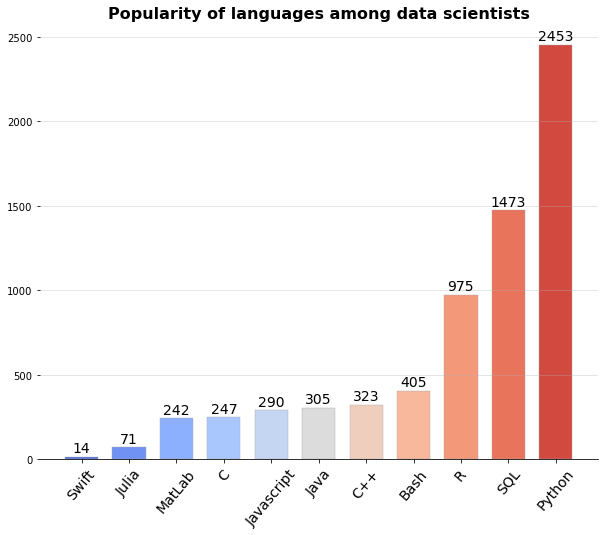

In [21]:
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(language_cnt.index,language_cnt['count'], edgecolor='darkgray',
           width=0.7, linewidth=0.4, color=sns.color_palette('coolwarm',11))

for l in language_cnt.index:
    ax.annotate(f"{language_cnt.loc[l,'count']}",
                xy = (l,language_cnt.loc[l,'count']+50),
                va = 'center',ha='center',fontsize=14)
for pos in ['left','right','top']:
    ax.spines[pos].set_color(None)
    
ax.set_xticklabels(language_cnt.index,fontsize=14,rotation=50)
ax.grid(axis='y',linestyle='-',alpha=0.4)
ax.set_title('Popularity of languages among data scientists',fontsize=16,fontweight='bold')

In [22]:
q7_ans_dropped_none = q7_ans.drop(columns=['None'],axis=1)
count_language = pd.DataFrame(q7_ans_dropped_none.isnull().sum(axis=1)).apply(lambda x: 11-x)
cnt_language = pd.DataFrame(count_language.value_counts().sort_index())
cnt_language.columns = ['cnt']
cnt_language['percentage'] = cnt_language['cnt']/len(ds)
cnt_language = cnt_language.reset_index()
cnt_language.columns = ['number','cnt','percentage']

In [23]:
fig = px.pie(cnt_language, names='number', values='cnt', 
             title='How many languages are used by data scientists?', 
             color_discrete_sequence=px.colors.sequential.Purples_r,
             width=650, height=650)
fig.update_traces(textinfo='percent')
fig.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')
fig.show()

Popularity of language (bar plot)
1. Both data scientists and students participators, Python are the most popular programming language. 
2. A lots of studens use classic objective-oriented languages like java, C, C++ regularly. The probable reason may be that most of student kagglers major in computer science and are equipped with software development ability.
3. Instead of languages regularly used in development, data scientists' popular languages include python, R, and SQL, which are highly related to their daliy work.

Number of languages used (Pie chart)
1. For both data scientist and student groups, about 80% of participators use less than 5 programming languages
2. There are still 8.2% of students who do not use programming language while There are almost no data scientists who do not use programming language.
3. It seems that there is no big difference between students and data scientists in the number of used language. Indeed, programming language is just a tool in the data science area.

If a student wants to become a data scientists, he should focus more on programming languages widely used in data science area.

# 3.3  Q11 Computing Platform & Q6 Coding Years

### Students

In [24]:
abbr_dict = {'A personal computer or laptop':'Personal Computer',
             'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)':'Cloud Computing Platform',
             'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)':'Deep Learning Workstation',
             'Other':'Other Platforms'}
students_dropped_q11_None = student.dropna(subset=['Q11'])
students_dropped_q11_None = students_dropped_q11_None[students_dropped_q11_None.Q11!='None']
students_dropped_q11_None['Q11'] = students_dropped_q11_None['Q11'].apply(lambda x: abbr_dict[x])

In [25]:
student_codetime_platform = students_dropped_q11_None[['Q6','Q11']]
student_codetime_platform['cnt'] = 1
student_pt_codetime_platform = pd.pivot_table(student_codetime_platform, values='cnt',
                                              index=['Q6'], columns=['Q11'], aggfunc='sum')
student_pt_codetime_platform.fillna(0,inplace=True)
for col in student_pt_codetime_platform.columns:
    student_pt_codetime_platform[col] = student_pt_codetime_platform[col].apply(lambda x: round(x))
q6_order = ['< 1 years','1-2 years','3-5 years',
            '5-10 years','10-20 years', '20+ years']
q11_order = ['Personal Computer','Cloud Computing Platform','Deep Learning Workstation','Other Platforms']
student_pt_codetime_platform = student_pt_codetime_platform.loc[q6_order,q11_order]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.2, 0.92, 'Platform choices for students of different coding years')

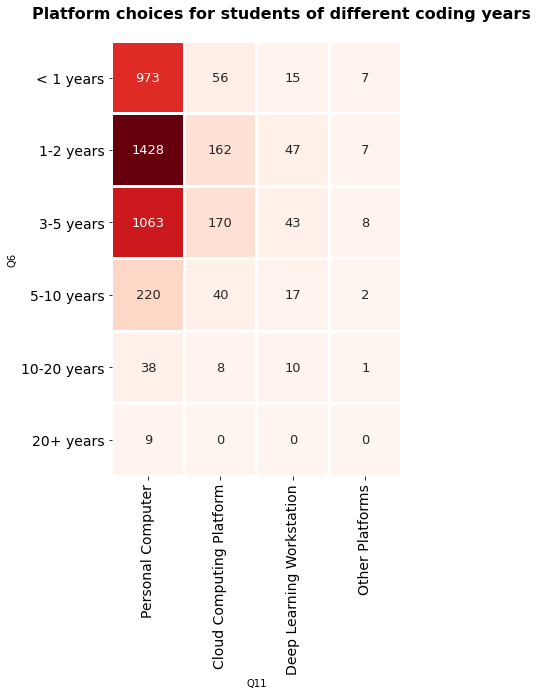

In [26]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(student_pt_codetime_platform,
            cmap = 'Reds', annot = True, annot_kws={"size": 13},fmt = 'd',linewidth = 2,
            square = True, cbar = False, ax=ax)
ax.set_yticklabels(student_pt_codetime_platform.index, fontsize=14, rotation = 0)
ax.set_xticklabels(student_pt_codetime_platform.columns, fontsize=14, rotation = 90)
fig.text(0.2,0.92,'Platform choices for students of different coding years',fontsize=16, fontweight='bold')

### Data Scientists

In [27]:
ds_dropped_q11_None = ds.dropna(subset=['Q11'])
ds_dropped_q11_None = ds_dropped_q11_None[ds_dropped_q11_None.Q11!='None']
ds_dropped_q11_None['Q11'] = ds_dropped_q11_None['Q11'].apply(lambda x: abbr_dict[x])
ds_codetime_platform = ds_dropped_q11_None[['Q6','Q11']]
ds_codetime_platform['cnt'] = 1
ds_pt_codetime_platform = pd.pivot_table(ds_codetime_platform, values='cnt',
                                              index=['Q6'], columns=['Q11'], aggfunc='sum')
ds_pt_codetime_platform.fillna(0,inplace=True)
for col in ds_pt_codetime_platform.columns:
    ds_pt_codetime_platform[col] = ds_pt_codetime_platform[col].apply(lambda x: round(x))
ds_pt_codetime_platform = ds_pt_codetime_platform.loc[q6_order,q11_order]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.15, 0.92, 'Platform choices for data scientists of different coding years')

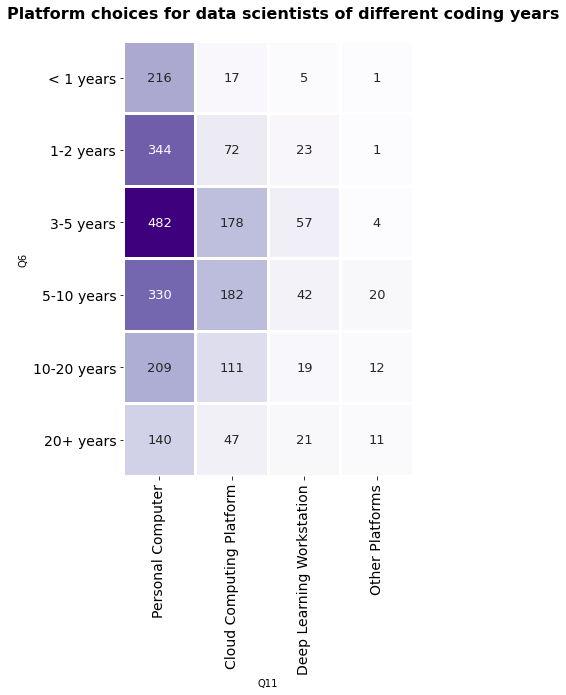

In [28]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(ds_pt_codetime_platform,
            cmap = 'Purples', annot = True, annot_kws={"size": 13},fmt = 'd',linewidth = 2,
            square = True, cbar = False, ax=ax)
ax.set_yticklabels(student_pt_codetime_platform.index, fontsize=14, rotation = 0)
ax.set_xticklabels(student_pt_codetime_platform.columns, fontsize=14, rotation = 90)
fig.text(0.15,0.92,'Platform choices for data scientists of different coding years',fontsize=16, fontweight='bold')

1. Students prefer to use perconal computer or laptop no matter how many the coding years they have. Cloud computing platforms are the second choice for students.
2. The platform choices of data scientists vary. More and more proportions of data scientists choose to use platforms other than PC when the coding year grows, although PC is still the first choice for data scientists.

From my points of view, students should get familiar with platforms other than PC because efficient machine learning tools like AutoML are built based on the cloud computing platforms, if they want to become data scientists. 

# 3.4 Q15 Machine Learning Years & Q6 Coding Years

In [29]:
student_dropped_q15_None = student.dropna(subset=['Q15'])
student_code_ml = student_dropped_q15_None[['Q6','Q15']]
q6_order = ['< 1 years','1-2 years','3-5 years',
            '5-10 years','10-20 years', '20+ years']
grouped_q6_q15 = student_code_ml[['Q6','Q15']].groupby(['Q6'])['Q15'].value_counts().unstack().reindex(q6_order)
grouped_q6_q15.fillna(0,inplace=True)
q15_order = ['I do not use machine learning methods', 'Under 1 year',
             '1-2 years', '2-3 years','3-4 years', '4-5 years', 
             '5-10 years', '10-20 years','20 or more years']
grouped_q6_q15 = grouped_q6_q15.loc[:,q15_order]
grouped_q6_q15['sum'] = np.sum(grouped_q6_q15,axis=1)

In [30]:
for col in q15_order:
    grouped_q6_q15[col] = grouped_q6_q15[col]/grouped_q6_q15['sum']
grouped_q6_q15.drop(columns=['sum'],axis=1,inplace=True)
abbr_columns = ['No experience','<1','1-2','2-3',
                          '3-4','4-5','5-10','10-20','>20']
grouped_q6_q15.columns = abbr_columns
grouped_q6_q15

,No experience,<1,1-2,2-3,3-4,4-5,5-10,10-20,>20
Q6,,,,,,,,,
< 1 years,0.297894,0.672016,0.024072,0.002006,0.001003,0.002006,0.000000,0.000000,0.001003
1-2 years,0.168164,0.618100,0.198331,0.012195,0.000000,0.001926,0.000642,0.000000,0.000642
3-5 years,0.086491,0.467875,0.317957,0.102965,0.016474,0.007414,0.000824,0.000000,0.000000
5-10 years,0.063670,0.329588,0.295880,0.161049,0.074906,0.052434,0.022472,0.000000,0.000000
10-20 years,0.000000,0.160714,0.232143,0.214286,0.089286,0.142857,0.142857,0.017857,0.000000
20+ years,0.222222,0.222222,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,0.000000


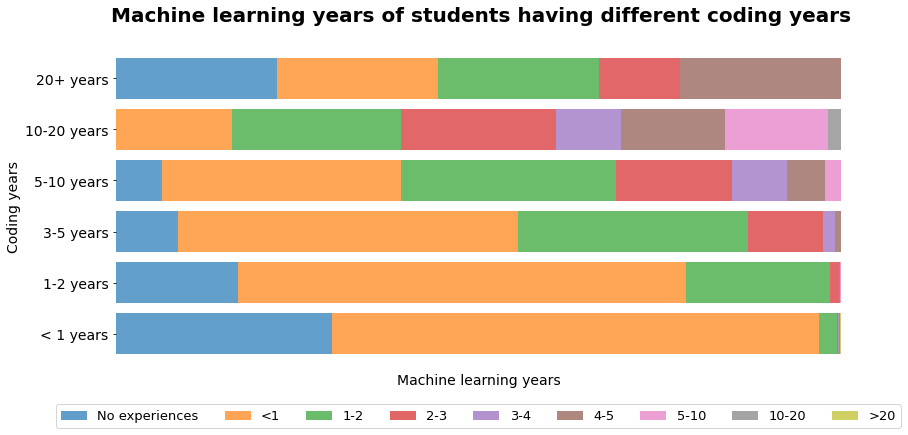

In [31]:
fig,ax = plt.subplots(figsize=(13,6))
ax.barh(grouped_q6_q15.index, grouped_q6_q15['No experience'],
        alpha=0.7,color=color_list[0],label='No experiences')
for i in range(1,len(abbr_columns)):
    ax.barh(grouped_q6_q15.index, grouped_q6_q15[abbr_columns[i]], 
            left = sum(grouped_q6_q15[abbr_columns[j]] for j in range(0,i)),
            alpha = 0.7,color=color_list[i],
            label = abbr_columns[i])

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_xlabel('Machine learning years',fontsize=14)
ax.set_yticklabels(grouped_q6_q15.index,fontsize=14)
ax.set_ylabel('Coding years', fontsize=14)

#for t in grouped_q6_q15.index:
#    for i in range(1,3):
#        ax.annotate(f"{grouped_q6_q15.loc[t,abbr_columns[i]]*100:.4}%",
#        xy = (grouped_q6_q15.loc[t,abbr_columns[i]]/2 + (sum(grouped_q6_q15.loc[t,abbr_columns[j]] for j in range(0,i))),t),
#        va = 'center',ha='center',fontsize=13,color='white' )
    
for pos in ['left','right','top','bottom']:
    ax.spines[pos].set_color(None)

fig.text(0.12,0.93,'Machine learning years of students having different coding years',
         fontsize=20,fontweight='bold')
ax.legend(loc='lower center',ncol=len(abbr_columns),fontsize=13,bbox_to_anchor=(0.5, -0.2))

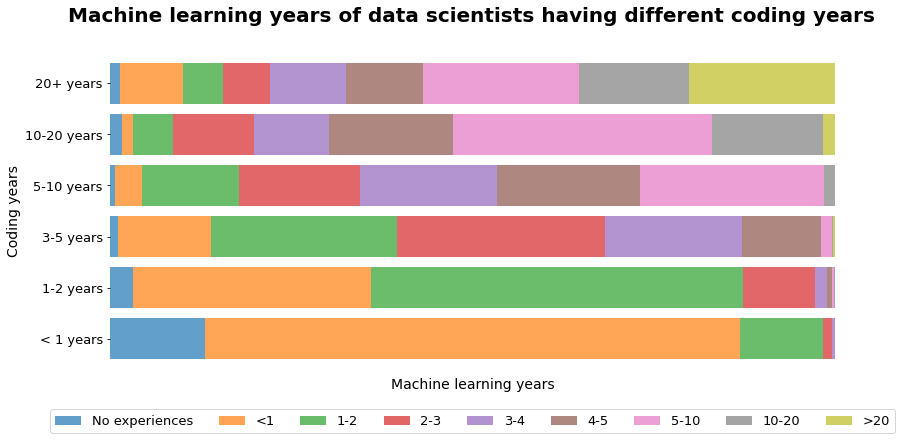

In [32]:
ds_dropped_q15_None = ds.dropna(subset=['Q15'])
ds_code_ml = ds_dropped_q15_None[['Q6','Q15']]
q6_order = ['< 1 years','1-2 years','3-5 years',
            '5-10 years','10-20 years', '20+ years']
grouped_q6_q15 = ds_code_ml[['Q6','Q15']].groupby(['Q6'])['Q15'].value_counts().unstack().reindex(q6_order)
grouped_q6_q15.fillna(0,inplace=True)
q15_order = ['I do not use machine learning methods', 'Under 1 year',
             '1-2 years', '2-3 years','3-4 years', '4-5 years', 
             '5-10 years', '10-20 years','20 or more years']
grouped_q6_q15 = grouped_q6_q15.loc[:,q15_order]
grouped_q6_q15['sum'] = np.sum(grouped_q6_q15,axis=1)

for col in q15_order:
    grouped_q6_q15[col] = grouped_q6_q15[col]/grouped_q6_q15['sum']
grouped_q6_q15.drop(columns=['sum'],axis=1,inplace=True)
abbr_columns = ['No experience','<1','1-2','2-3',
                          '3-4','4-5','5-10','10-20','>20']
grouped_q6_q15.columns = abbr_columns
grouped_q6_q15

fig,ax = plt.subplots(figsize=(13,6))
ax.barh(grouped_q6_q15.index, grouped_q6_q15['No experience'],
        alpha=0.7,color=color_list[0],label='No experiences')
for i in range(1,len(abbr_columns)):
    ax.barh(grouped_q6_q15.index, grouped_q6_q15[abbr_columns[i]], 
            left = sum(grouped_q6_q15[abbr_columns[j]] for j in range(0,i)),
            alpha = 0.7,color=color_list[i],
            label = abbr_columns[i])

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_xlabel('Machine learning years', fontsize=14)
ax.set_yticklabels(grouped_q6_q15.index,fontsize=13)
ax.set_ylabel('Coding years', fontsize=14)

#for t in grouped_q6_q15.index:
#    for i in range(2,3):
#        ax.annotate(f"{grouped_q6_q15.loc[t,abbr_columns[i]]*100:.3}%",
#        xy = (grouped_q6_q15.loc[t,abbr_columns[i]]/2 + (sum(grouped_q6_q15.loc[t,abbr_columns[j]] for j in range(0,i))),t),
#        va = 'center',ha='center',fontsize=13,color='white' )
    
for pos in ['left','right','top','bottom']:
    ax.spines[pos].set_color(None)

fig.text(0.08,0.94,'Machine learning years of data scientists having different coding years',
         fontsize=20,fontweight='bold')
ax.legend(loc='lower center',ncol=len(abbr_columns),fontsize=13, bbox_to_anchor=(0.5, -0.2))

1. For both data scientists and students, with the growth of coding years, machine learning experience grows.  
2. Students using machine learning methods less than one year still take the first place in most groups of different coding years.
3. It is interesting that there are some data scientists who have less than one coding year but have 1-2 years of machine learning experience.
4. When years of coding are more than 3 years, more than 50% of data scientists have more than 2 years of machine learning experience. However, When years of coding are more than more than 5 years, more than 50% of students have more than 1 year of machine learning experience.

If a student want to become a data scientist, more and more machine learning experiences is an critical requirement.

# 3.5 Q15 Machine Learning Years & Q17 Machine Learning Algorithm

### Data Scientist

In [33]:
q15_order = ['I do not use machine learning methods', 'Under 1 year',
             '1-2 years', '2-3 years','3-4 years', '4-5 years', 
             '5-10 years', '10-20 years','20 or more years']
ds_alg = ds[['Q15','Q17_Part_1']].dropna(subset=['Q17_Part_1'])
cnt_q15_q17 = pd.DataFrame(ds_alg['Q15'].value_counts()).reindex(q15_order)
cnt_q15_q17.columns = ['Q17_Part_1']
for i in range(2,12):
    try:
        tmp = ds[['Q15','Q17_Part_'+str(i)]].dropna(subset=['Q17_Part_'+str(i)])
        cnt = pd.DataFrame(tmp.Q15.value_counts()).reindex(q15_order)
        cnt.columns = ['Q17_Part_'+str(i)]
        
    except:
        print('Q17_Part'+str(i)+' does not exist')
        
    cnt_q15_q17 = pd.concat([cnt_q15_q17,cnt],axis=1)
    
cnt_q15_q17 = cnt_q15_q17.loc['Under 1 year':,:]
cnt_q15_q17.fillna(0,inplace=True)
cnt_q15_q17.columns = ['Linear or Logistic Regression', 'Decision Trees or Random Forests',
                       'Gradient Boosting Machines','Bayesian Approaches', 
                       'Evolutionary Approaches','Dense Neural Networks',
                       'Convolutional Neural Networks','Generative Adversarial Networks',
                       'Recurrent Neural Networks','Transformer Network','None']

Text(0.15, 0.92, 'among data scientists of different machine learning experiences')

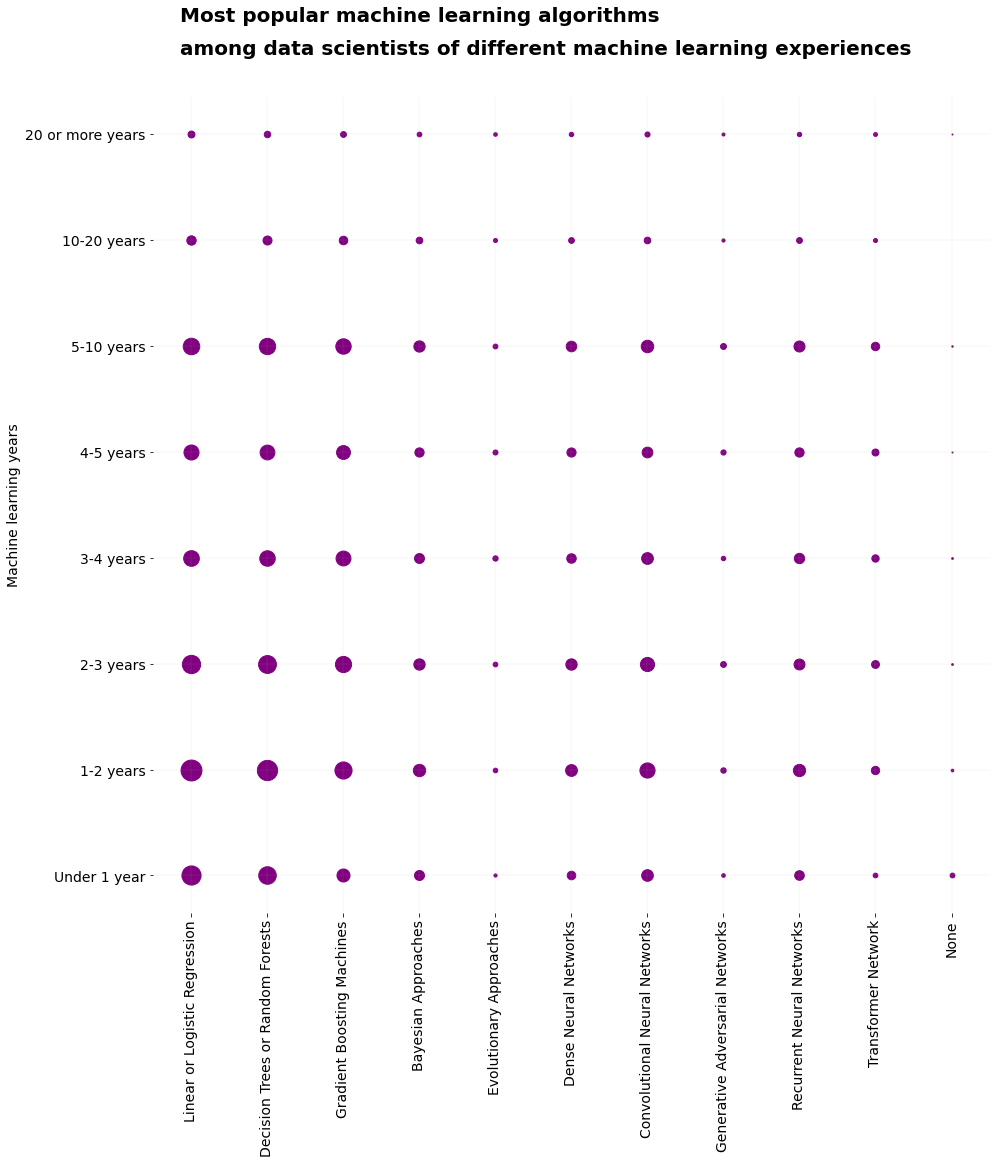

In [34]:
fig,ax = plt.subplots(figsize=(15,15))
for q15 in cnt_q15_q17.index:
    for q17 in cnt_q15_q17.columns:
        group_cnt = cnt_q15_q17.loc[q15,q17]
        ax.scatter(q17,q15,s=group_cnt,color='purple')

ax.set_xticklabels(cnt_q15_q17.columns,fontsize=14,rotation=90)
ax.set_yticklabels(cnt_q15_q17.index,fontsize=14)
ax.set_ylabel('Machine learning years',fontsize=14)
ax.grid(alpha=0.4,linewidth=0.3)

for pos in ['left','right','top','bottom']:
    ax.spines[pos].set_color(None)

fig.text(0.15,0.95,'Most popular machine learning algorithms ',
         fontsize=20, fontweight='bold')
fig.text(0.15,0.92,'among data scientists of different machine learning experiences',
         fontsize=20, fontweight='bold')

Among data scientists of different machine learning experiences:

1. Linear/Logistic regression models, tree modelsm, boosting models, CNN and RNN are the most popular ones.
2. Traditional Machine learning models are more popular than Deep Learning models.

From my opinions, traditional machine learning models perform well in most of the practical tasks in data scientists' works. Data scientists who regularly use deep learning models are more likely to work on AI tasks in CV and NLP area and the number of this type of data scientists are less than other types.

For students who want to become data scientists, don't forget to dive deep into classic ML algorithms before go into fancy deep learning models.

# 3.6 Q39 Favourite Media Sources 

### Data Scientist

Let me take a look at the social meidas that data scientists prefer to get inspired from. It may give students advices about learning data science.

** It is a 'select all that apply' question so the summation of the all the column values may exceed the the number of participators **

In [35]:
q39_ans = np.empty((len(ds),0))
for i in range(1,12):
    try:
        q39_ans = np.column_stack((q39_ans,ds['Q39_Part_'+str(i)]))
    except:
        print('column Q39_Part_'+str(i)+ ' does not exist')
            
q39_ans = pd.DataFrame(q39_ans)
for col in q39_ans.columns:
    q39_ans[col] = q39_ans[col].apply(lambda x: re.sub('\(.*?\)','',x) if x is not np.nan else x)

q39_ans.columns = ['Twitter','Email newsletters','Reddit','Kaggle','Course Forums',
               'YouTube','Podcasts','Blogs','Journal Publications','Slack Communities','None']

In [36]:
media_cnt = np.empty((1,0))
for col in q39_ans.columns:
    media_cnt = np.append(media_cnt,q39_ans[col].value_counts())
media_cnt = pd.DataFrame(media_cnt)
media_cnt.index = q39_ans.columns
media_cnt.columns = ['count']
media_cnt['count'] = media_cnt['count'].apply(lambda x: round(x)) 
media_cnt = media_cnt.sort_values(by='count',ascending=True)

Text(0.5, 1.0, 'Popularity of medias among data scientists')

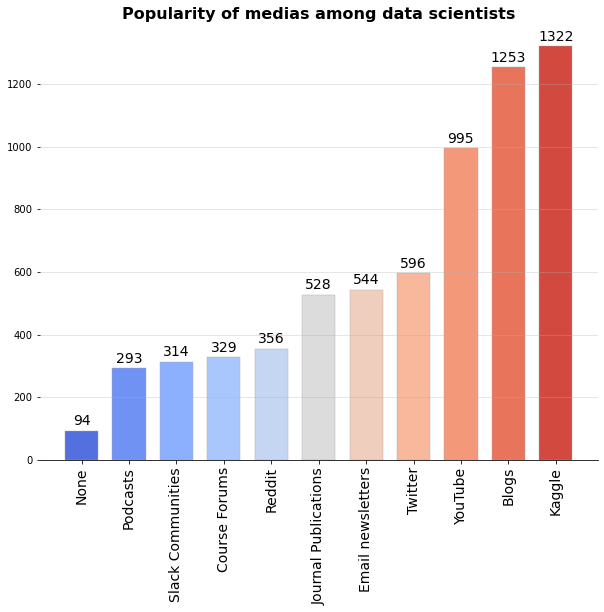

In [37]:
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(media_cnt.index, media_cnt['count'], edgecolor='darkgray',
           width=0.7, linewidth=0.4, color=sns.color_palette('coolwarm',11))

for l in media_cnt.index:
    ax.annotate(f"{media_cnt.loc[l,'count']}",
                xy = (l,media_cnt.loc[l,'count']+30),
                va = 'center',ha='center',fontsize=14)
for pos in ['left','right','top']:
    ax.spines[pos].set_color(None)
    
ax.set_xticklabels(media_cnt.index,fontsize=14,rotation=90)
ax.grid(axis='y',linestyle='-',alpha=0.4)
ax.set_title('Popularity of medias among data scientists',fontsize=16,fontweight='bold')

1. Kaggle and Blogs are the most popular media sources among data scientists.
2. General medias like Youtube and Twitter are also an critical learning sources for data scientists.

So students, continue kaggling and read more blogs! This is the 'secret' of becoming data professionals.